#### Prediction

This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 

You have to build a model that can predict whether the loan of the applicant will be approved or not on the basis of the details provided in the dataset. 


# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("C:/Users/Hrushikesh/Desktop/DSData-master/loan_prediction.csv")
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


The data set contains both numerical and categorical columns full. The data include details of applicants who have applied for the loan.  Here loan status is our target variable which has two classes yes and no. So it will term as a classification problem

In [3]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
data.shape

(614, 13)

In [5]:
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

The data set contains object integer and float type data we have to include the categorical data for further processing

In [6]:
# Checking for Categirical columns
categorical_col=[]
for i in data.dtypes.index:
    if data.dtypes[i]=='object':
        categorical_col.append(i)
print(categorical_col)

['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']


These are the categorical columns given in the dataset.

In [7]:
# Checking for Numerical columns
numerical_col=[]
for i in data.dtypes.index:
    if data.dtypes[i]!='object':
        numerical_col.append(i)
print(numerical_col)

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']


These are the numerical columns present in the dataset.

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [9]:
data.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

These are the unique values present in the columns

In [10]:
# Checking the value counts of each columns
for i in data.columns:
    print(data[i].value_counts())
    print("\n")

LP001761    1
LP001146    1
LP001233    1
LP002618    1
LP002036    1
           ..
LP002226    1
LP002209    1
LP001565    1
LP001974    1
LP001334    1
Name: Loan_ID, Length: 614, dtype: int64


Male      489
Female    112
Name: Gender, dtype: int64


Yes    398
No     213
Name: Married, dtype: int64


0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64


Graduate        480
Not Graduate    134
Name: Education, dtype: int64


No     500
Yes     82
Name: Self_Employed, dtype: int64


2500    9
6000    6
2600    6
4583    6
4166    5
       ..
5503    1
3450    1
2425    1
2423    1
4095    1
Name: ApplicantIncome, Length: 505, dtype: int64


0.0       273
2500.0      5
2083.0      5
1666.0      5
1625.0      3
         ... 
2365.0      1
1695.0      1
2466.0      1
2375.0      1
1700.0      1
Name: CoapplicantIncome, Length: 287, dtype: int64


120.0    20
110.0    17
100.0    15
160.0    12
187.0    12
         ..
211.0     1
250.0     1
62.0      1
85.0      1
436

These are the list of value counts present in the each column

The column Loan_ID is unique ID given to the applicants it has no significance in the prediction so let's drop this column

In [11]:
data.drop('Loan_ID',axis=1,inplace=True)

In [12]:
data.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

We can observe the missing values in the columns gender, dependants, married, self_employed, loan_amount, loan_amount_ term, credit_history.


<AxesSubplot:>

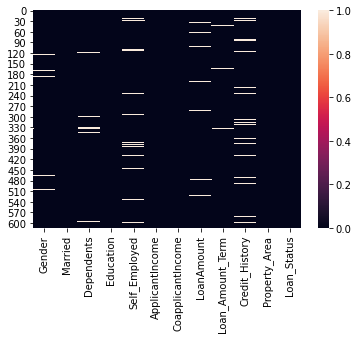

In [13]:
sns.heatmap(data.isnull())

White lines in the heatmap indicates the missing values present in the data set

In [14]:
data.skew()

ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.677552
Loan_Amount_Term    -2.362414
Credit_History      -1.882361
dtype: float64

In [15]:
#Filling the missing values
data['Gender'] = data['Gender'].fillna(data['Gender'].mode()[0])
data['Married'] = data['Married'].fillna(data['Married'].mode()[0])
data['Dependents'] = data['Dependents'].fillna(data['Dependents'].mode()[0])
data['Self_Employed'] = data['Self_Employed'].fillna(data['Self_Employed'].mode()[0])
data['Credit_History'] = data['Credit_History'].fillna(data['Credit_History'].mode()[0])
data['Loan_Amount_Term'] = data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mode()[0])

In [16]:
data.isnull().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

Let's fill the null values in numerical column that is Loan Amount.

Loan amount is continuous data and has outliers and skewness so we will heal the null values using median

In [17]:
data["LoanAmount"] = data["LoanAmount"].fillna(data["LoanAmount"].median())

In [18]:
data.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

There is no missing values

<AxesSubplot:>

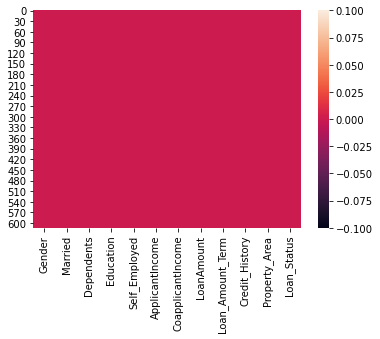

In [19]:
sns.heatmap(data.isnull())

We can visualize there is no missing values


In [20]:
#checking the uniqueness of Label
data['Loan_Status'].unique()

array(['Y', 'N'], dtype=object)

In [21]:
data['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

- We have two counts in Loan_status namely Y and N. Here Y stands for Yes means Loan of the application is approved and N stats for loan of the applicants is not approved

In [22]:
data.loc[data["Loan_Status"] == " "]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status


There are no spaces in the dataset

In [23]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.752443,342.410423,0.855049
std,6109.041673,2926.248369,84.107233,64.428629,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,128.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


This gives the statistical summary of the dataset.
- The counts of all the columns are same which means there is no null values present in the dataset.
- The mean value is greater than the median in ApplicantIncome,CoapplicantIncome,LoanAmount which means they are skewed to the right.
- The median is greater than mean in loan_amount_term and credit_history which means they are skewed to the left
- There is a huge difference between mean and standard deviation
- There is a huge difference in Max and 75 percentile which means there are huge outliers present in the data set. We will remove this outliers using Zscore and IQR method.

# Data Visualization

Y    422
N    192
Name: Loan_Status, dtype: int64


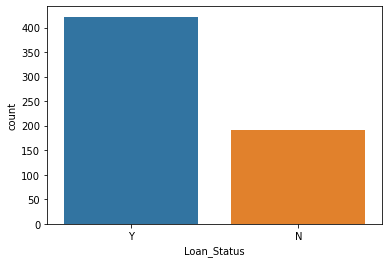

In [24]:
print(data['Loan_Status'].value_counts())
sns.countplot(data['Loan_Status'])
plt.show()

- The count of Y is maximum compared to N that means total 422 applicants get their loan and 122 applicants gets denied.

- we need to balance the data as there is a imbalance in the classes


Male      502
Female    112
Name: Gender, dtype: int64


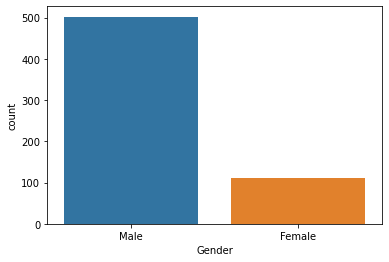

In [25]:
print(data['Gender'].value_counts())
sns.countplot(data['Gender'])
plt.show()

- There are more numbers of male applicant than female applicants the total number of male applicants are 502 whereas female applicants are 112

Yes    401
No     213
Name: Married, dtype: int64


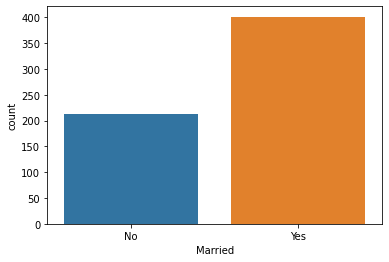

In [26]:
print(data['Married'].value_counts())
sns.countplot(data['Married'])
plt.show()

- The number of married applicants who have applied for loan are 401 whereas unmarried applicants are 213


0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64


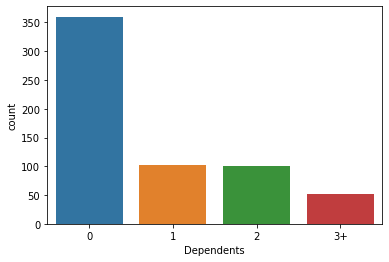

In [27]:
print(data['Dependents'].value_counts())
sns.countplot(data['Dependents'])
plt.show()

- The  applicants who have 0 dependents have high counts and theapplicants having more than 3 dependents counts are very less

Graduate        480
Not Graduate    134
Name: Education, dtype: int64


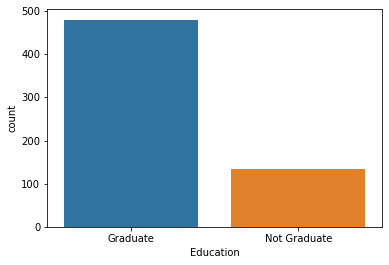

In [28]:
print(data['Education'].value_counts())
sns.countplot(data['Education'])
plt.show()

- The count of graduates is high which means the maximum number of graduates applied for the loan


No     532
Yes     82
Name: Self_Employed, dtype: int64


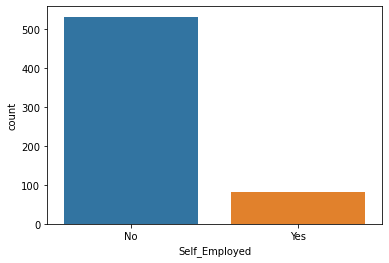

In [29]:
print(data['Self_Employed'].value_counts())
sns.countplot(data['Self_Employed'])
plt.show()

- Most of the applicants are not self employed they are 532 and 82 applicants are self employed


1.0    525
0.0     89
Name: Credit_History, dtype: int64


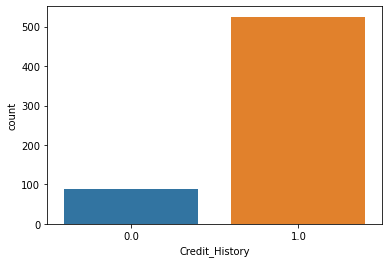

In [30]:
print(data['Credit_History'].value_counts())
sns.countplot(data['Credit_History'])
plt.show()

Most of the applicants who have credit history 1 are high in numbers

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

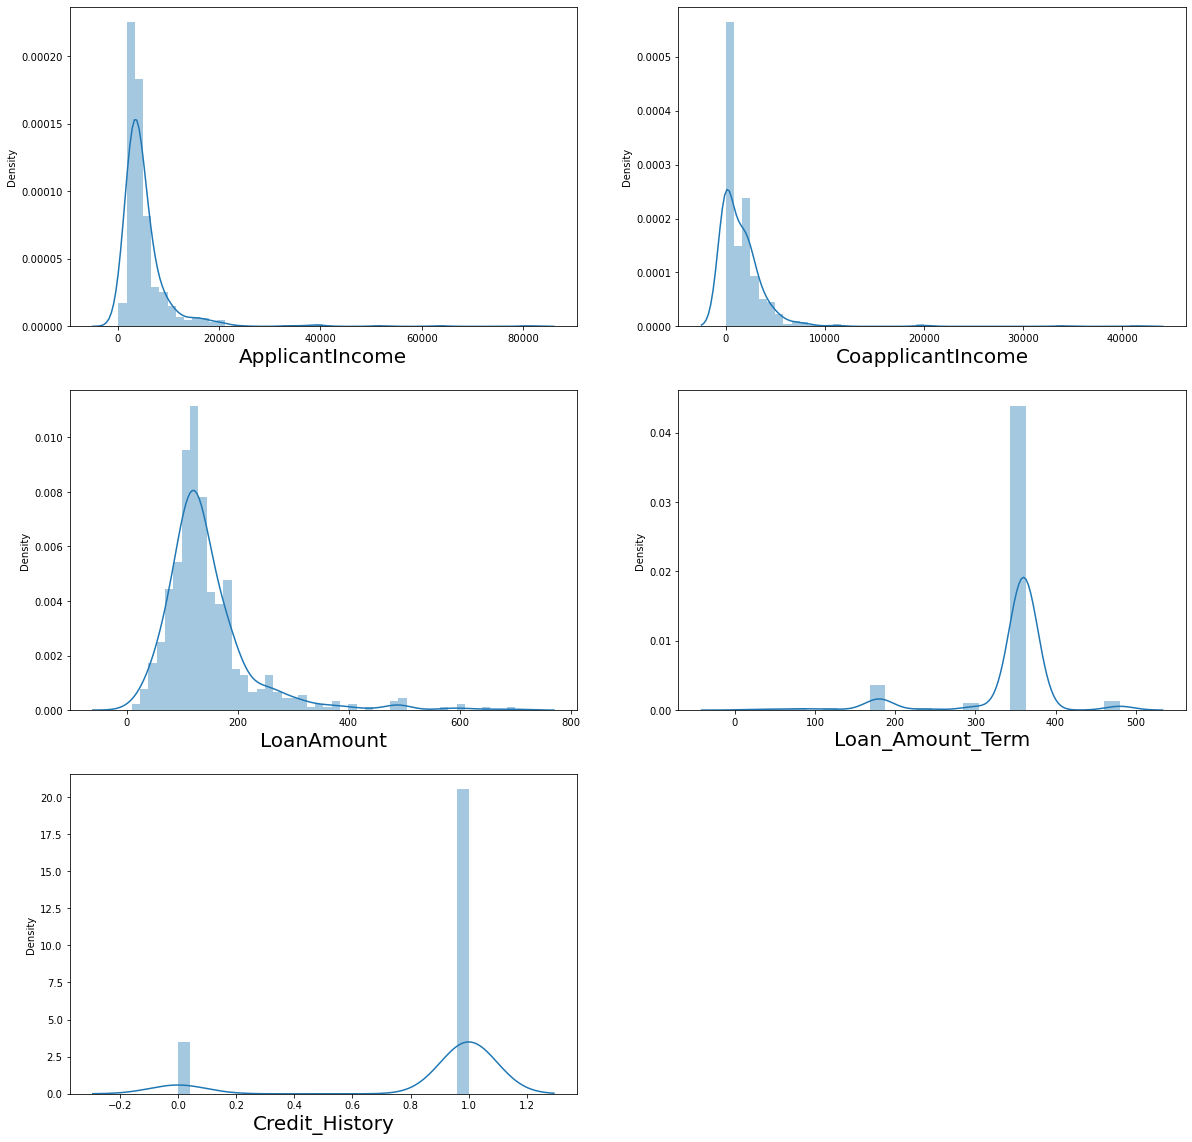

In [31]:
# Distribution of skewness
plt.figure(figsize=(20,20), facecolor='white')
plotnumber = 1

for column in numerical_col:
    if plotnumber<=9:
        ax = plt.subplot(3,2,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout

From the above distribution plot we can observe that

- The data is not distributed normally in any of the column.

- The mean value is greater than median in applicants income, Co applicants income, loan amount and total income which means they are skewed to the right

- The median is greater than mean in loan amount term and credit history column which means they are skewed to the left

# Bivariate Analysis

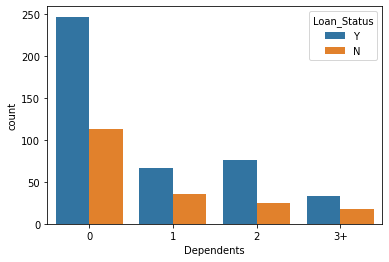

In [32]:
sns.countplot(data['Dependents'],hue=data['Loan_Status'], data=data)
plt.show()

- The count of zero dependents is high which means most of the applicants have no dependents. The three plus dependents means more than three applicants have dependents

- The applicants we have dependent zero are likely to get their loan approved


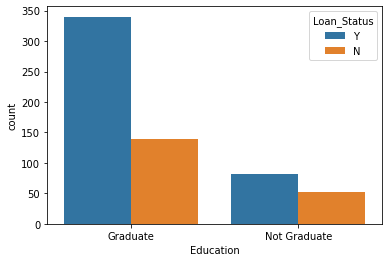

In [33]:
sns.countplot(data['Education'],hue=data['Loan_Status'])
plt.show()

Most of the applicants who have applied for loans are graduated and only few are not graduated. Change we can clearly see that graduates we have applied for the loan mostly get approved

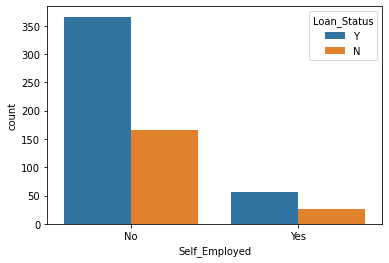

In [34]:
sns.countplot(data['Self_Employed'],hue=data['Loan_Status'])
plt.show()

- Most of the applicants are not self employed means they are working in a private sector and only few of the applicants are self employed

- The applicants who are not self employed have tendency of getting their loans than self employed applicants.

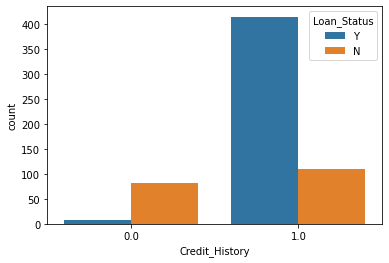

In [35]:
sns.countplot(data['Credit_History'],hue=data['Loan_Status'])
plt.show()

The credit history give the information of the applicants who took loan in the past have cleared or not. Here we can notice the applicants who have credit history 1 have high counts which means most of the applicants have cleared their past loans and only few of them have to clear it.


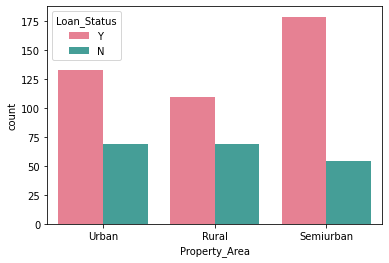

In [36]:
sns.countplot(data['Property_Area'],hue=data['Loan_Status'],palette='husl')
plt.show()

- Most of the applicants from the semi urban have applied for the loan followed by the urban areas


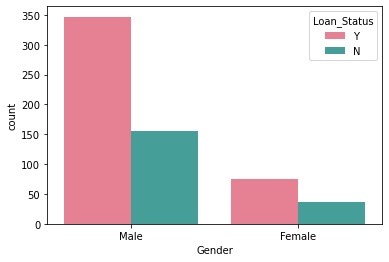

In [37]:
sns.countplot(data['Gender'],hue=data['Loan_Status'],palette='husl')
plt.show()

Males applicants are more than female applicants.

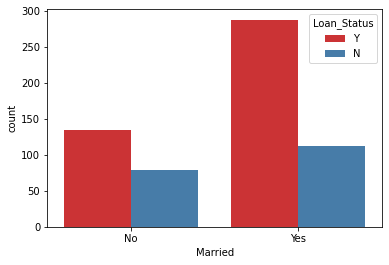

In [38]:
sns.countplot(data['Married'],hue=data['Loan_Status'],palette='Set1')
plt.show()

- The married applicants are than female applicants.

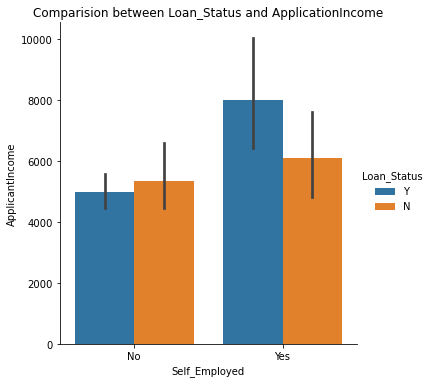

In [39]:
sns.catplot(x='Self_Employed',y='ApplicantIncome',data=data,kind='bar',hue='Loan_Status')
plt.title("Comparision between Loan_Status and ApplicationIncome")
plt.show()

The applicants whose loan got approved have high average income

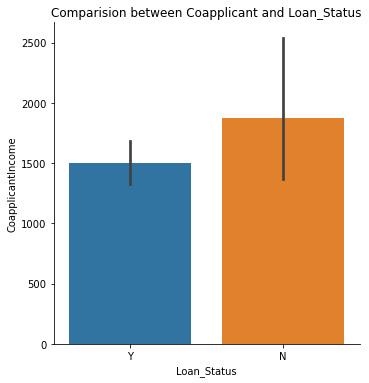

In [40]:
sns.catplot(x='Loan_Status',y='CoapplicantIncome',data=data,kind='bar')
plt.title("Comparision between Coapplicant and Loan_Status")
plt.show()

The Coapplicants who got loan have average income

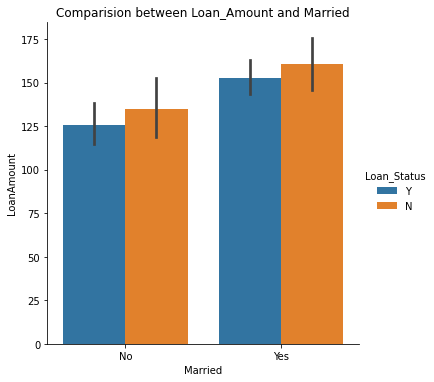

In [41]:
sns.catplot(x='Married',y='LoanAmount',data=data,kind='bar',hue='Loan_Status')
plt.title("Comparision between Loan_Amount and Married")
plt.show()

The applicants who got married and have average loan amount have more tendency to get the loan


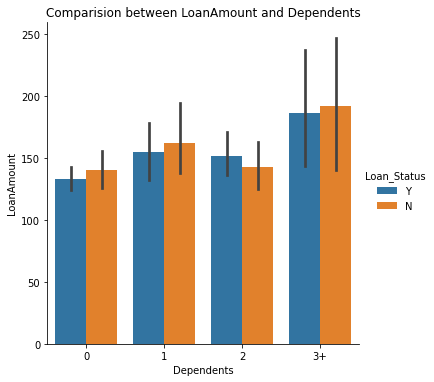

In [42]:
sns.catplot(x='Dependents',y='LoanAmount',data=data,kind='bar',hue='Loan_Status')
plt.title("Comparision between LoanAmount and Dependents")
plt.show()

The applicants who have more than 3 dependents with average loan amount How got their loan approved


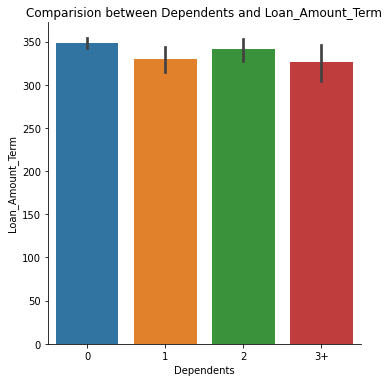

In [43]:
sns.catplot(x='Dependents',y='Loan_Amount_Term',data=data,kind='bar')
plt.title("Comparision between Dependents and Loan_Amount_Term")
plt.show()

The applicants 0 dependents have high loan amount term followed by the dependent 2

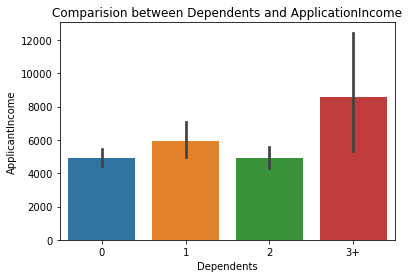

In [44]:
sns.barplot(x='Dependents',y='ApplicantIncome',data=data)
plt.title("Comparision between Dependents and ApplicationIncome")
plt.show()

The applicants dependents more than 3 has high average income and dependents with 2 has less income



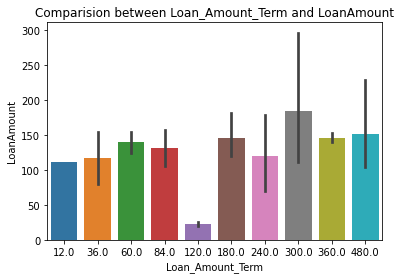

In [45]:
sns.barplot(x='Loan_Amount_Term',y='LoanAmount',data=data)
plt.title("Comparision between Loan_Amount_Term and LoanAmount")
plt.show()

The loan amount term 300.0 is high with loan amount compared to others.

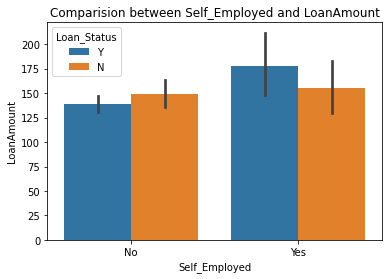

In [46]:
sns.barplot(x='Self_Employed',y='LoanAmount',data=data, hue='Loan_Status')
plt.title("Comparision between Self_Employed and LoanAmount")
plt.show()

# Outliers

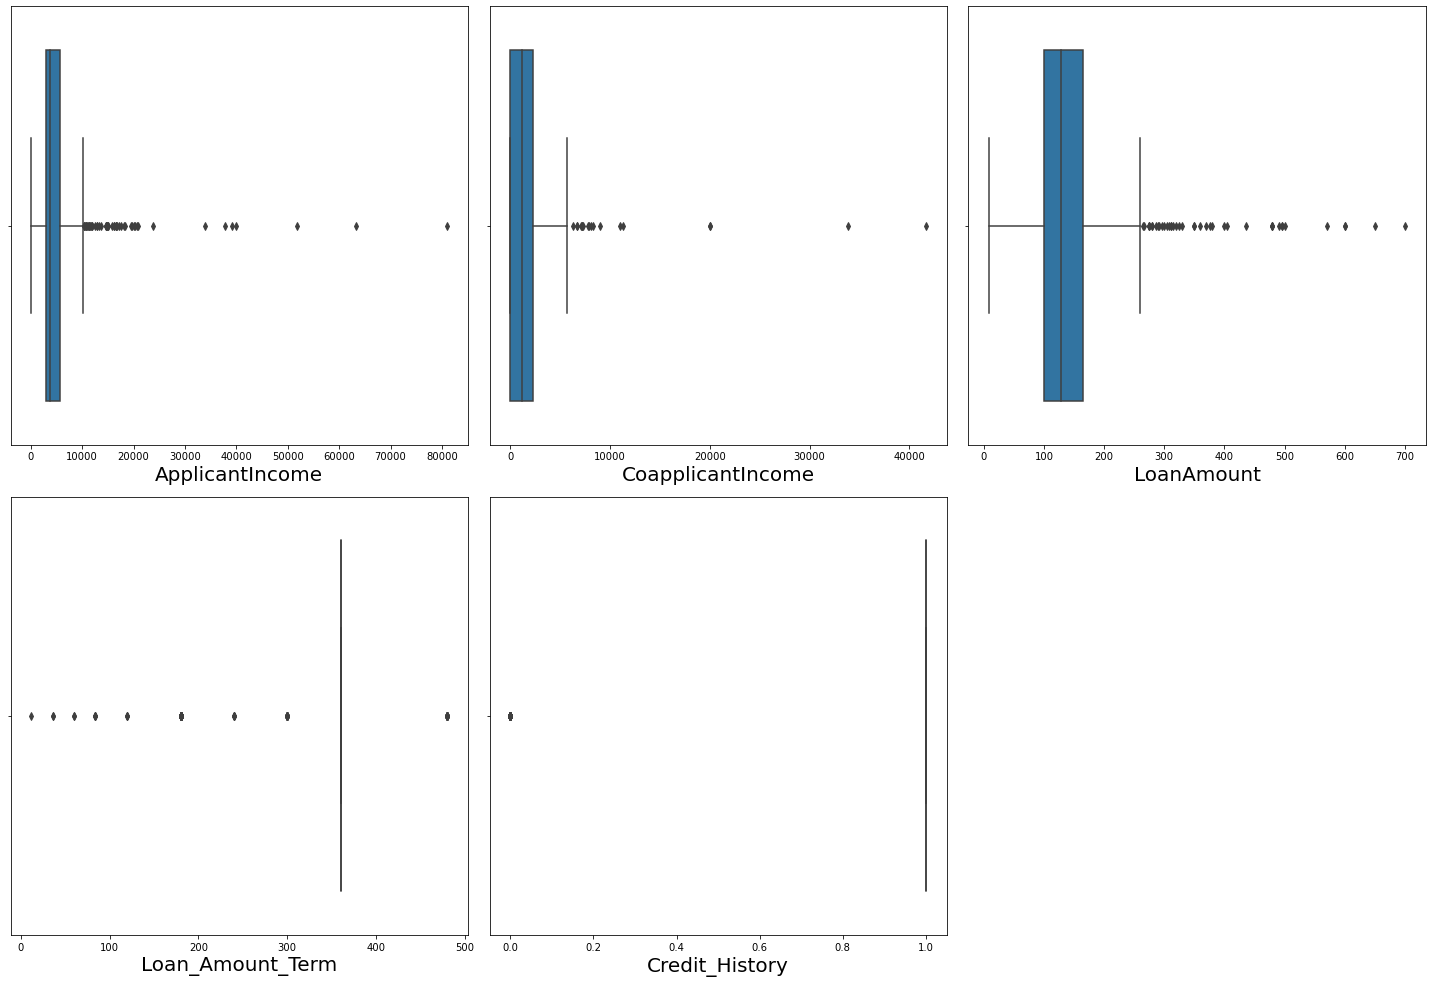

In [47]:
plt.figure(figsize=(20,20), facecolor='white')
plotnumber = 1

for column in numerical_col:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.boxplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

We can observe the outliers present in all the columns. But the columns credit history has only two unique values so no need to remove the outliers in this column let's remove outliers in remaining columns


In [48]:
from scipy.stats import zscore
features = data[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']]
z = np.abs(zscore(features))
z

array([[0.07299082, 0.55448733, 0.21124125, 0.2732313 ],
       [0.13441195, 0.03873155, 0.21124125, 0.2732313 ],
       [0.39374734, 0.55448733, 0.94899647, 0.2732313 ],
       ...,
       [0.43717437, 0.47240418, 1.27616847, 0.2732313 ],
       [0.35706382, 0.55448733, 0.49081614, 0.2732313 ],
       [0.13441195, 0.55448733, 0.15174486, 0.2732313 ]])

In [49]:
new_data = data[(z<3).all(axis=1)]
new_data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [50]:
print(data.shape)
print(new_data.shape)

(614, 12)
(577, 12)


In [51]:
loss = (614-577)/614*100
loss

6.026058631921824

The data loss using zscore is 6.02%

# IQR

In [52]:
# 1st quantile
Q1 = features.quantile(0.25)

# 3rd Quantile
Q3 = features.quantile(0.75)

#IQR
IQR = Q3-Q1

data1 = data[~((data<(Q1-1.5*IQR)) | (data>(Q3+1.5*IQR))).any(axis=1)]

In [53]:
data1

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
608,Male,Yes,0,Graduate,No,3232,1950.0,108.0,360.0,1.0,Rural,Y
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [54]:
print(data.shape)
print(data1.shape)

(614, 12)
(459, 12)


In [55]:
loss = (614-459)/614*100
loss



25.2442996742671

Using IQR method the data loss is 25%. So we will consider Zscore method.

# Skewness

In [56]:
data.skew()

ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.743053
Loan_Amount_Term    -2.402112
Credit_History      -2.021971
dtype: float64

This skewness is present in all columns. Here the columns credit history and loan amount term have categorical data so need to remove the skewness


In [57]:
skewed_features = ["ApplicantIncome","CoapplicantIncome","LoanAmount"]



from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
'''
parameters:
method = 'box-cox' or 'yeo-johnson'
'''

"\nparameters:\nmethod = 'box-cox' or 'yeo-johnson'\n"

In [58]:

new_data[skewed_features] = scaler.fit_transform(new_data[skewed_features].values)
new_data[skewed_features].head()

,ApplicantIncome,CoapplicantIncome,LoanAmount
0,0.681780,-1.122446,0.000771
1,0.234783,0.744117,0.000771
2,-0.527201,-1.122446,-1.437336
3,-0.791972,0.895786,-0.153545
4,0.728848,-1.122446,0.238260


In [59]:
new_data.skew()

ApplicantIncome      0.027981
CoapplicantIncome   -0.191876
LoanAmount           0.048425
Loan_Amount_Term    -2.098806
Credit_History      -1.976043
dtype: float64

So the skewness has been removed

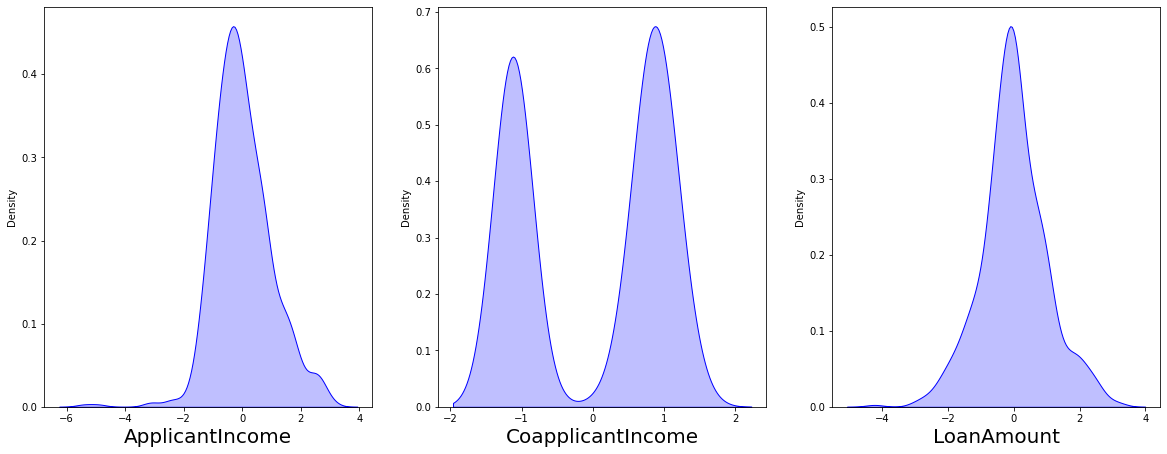

In [60]:
# After removing skewness,visualizing the dta distribution in each column.
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in new_data[skewed_features]:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(new_data[column],color='b',kde_kws={"shade":True},hist=False)
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

The data is almost normal also we have remove the skewness as we can see in the above visualization

# Encoding

In [61]:
from sklearn.preprocessing import LabelEncoder
categorical_col = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area','Loan_Status']
lbl = LabelEncoder()
new_data[categorical_col]=new_data[categorical_col].apply(lbl.fit_transform)

In [62]:
new_data[categorical_col]

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,1,0,0,0,0,2,1
1,1,1,1,0,0,0,0
2,1,1,0,0,1,2,1
3,1,1,0,1,0,2,1
4,1,0,0,0,0,2,1
...,...,...,...,...,...,...,...
609,0,0,0,0,0,0,1
610,1,1,3,0,0,0,1
611,1,1,1,0,0,2,1
612,1,1,2,0,0,2,1


# Correlation

In [63]:
corr = new_data.corr()
corr

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.378997,0.188162,0.045696,-0.006207,0.058590,0.234551,0.172146,-0.104983,0.013172,-0.026340,0.017408
Married,0.378997,1.000000,0.329900,0.024817,-0.015779,-0.024783,0.335820,0.181878,-0.127348,0.019308,0.010595,0.089026
Dependents,0.188162,0.329900,1.000000,0.069814,0.044543,0.105994,0.004109,0.131772,-0.087389,-0.020288,0.002327,0.017872
Education,0.045696,0.024817,0.069814,1.000000,-0.007139,-0.176074,0.049739,-0.128715,-0.090523,-0.075217,-0.068596,-0.092658
Self_Employed,-0.006207,-0.015779,0.044543,-0.007139,1.000000,0.212260,-0.087338,0.117218,-0.032914,-0.016390,-0.028253,-0.026525
ApplicantIncome,0.058590,-0.024783,0.105994,-0.176074,0.212260,1.000000,-0.360946,0.432154,-0.069429,0.028825,-0.011364,-0.002484
CoapplicantIncome,0.234551,0.335820,0.004109,0.049739,-0.087338,-0.360946,1.000000,0.200081,0.000951,0.006564,-0.074476,0.079344
LoanAmount,0.172146,0.181878,0.131772,-0.128715,0.117218,0.432154,0.200081,1.000000,0.049057,-0.003626,-0.098090,-0.023609
Loan_Amount_Term,-0.104983,-0.127348,-0.087389,-0.090523,-0.032914,-0.069429,0.000951,0.049057,1.000000,0.027392,-0.057004,-0.020291
Credit_History,0.013172,0.019308,-0.020288,-0.075217,-0.016390,0.028825,0.006564,-0.003626,0.027392,1.000000,-0.008121,0.560936


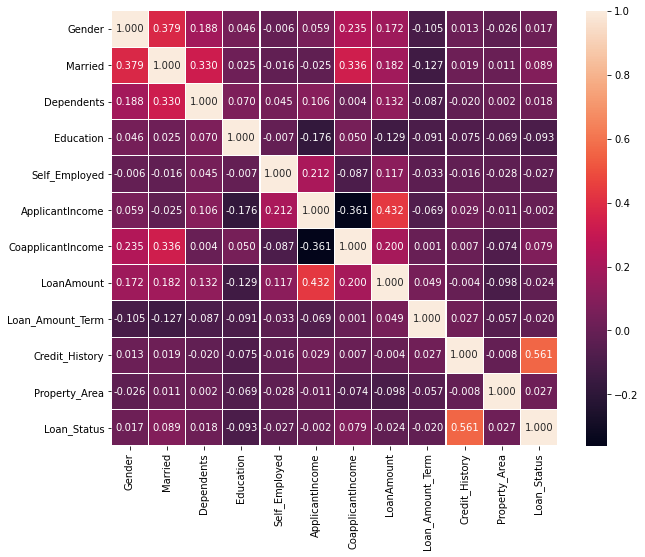

In [64]:
plt.figure(figsize=(10,8))
sns.heatmap(new_data.corr(),linewidths=.1,fmt="0.3f",annot=True)
plt.show()

This heatmap shows the correlation matrix by visualising the data we can observe the relation between one feature to another

- The target column lone status is highly positively correlated with the feature column credit history

- The other features have very less Correlation with target column

- Also we can notice there is no multicollinearity issue in the futures.

- Applicant income and gender is very less correlated with target



In [65]:
plt.figure(figsize=(22,7))
data.corr()['Loan_Status'].sort_values(ascending=False).drop(['Loan_Status']).plot(kind='bar',color='c')
plt.xlabel('Features',fontsize=14)
plt.ylabel('Target',fontsize=14)
plt.title('Correlation between label and features using Bar plot', fontsize=18)
plt.show()

KeyError: 'Loan_Status'

<Figure size 1584x504 with 0 Axes>

In [66]:

x = new_data.drop("Loan_Status",axis=1)
y = new_data["Loan_Status"]

In [67]:
x.shape

(577, 11)

In [68]:
y.shape

(577,)

# Standard Scalar


In [69]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x= pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.477137,-1.362511,-0.723313,-0.541961,-0.380580,0.681780,-1.122446,0.000771,0.230853,0.418513,1.227472
1,0.477137,0.733939,0.282353,-0.541961,-0.380580,0.234783,0.744117,0.000771,0.230853,0.418513,-1.306522
2,0.477137,0.733939,-0.723313,-0.541961,2.627567,-0.527201,-1.122446,-1.437336,0.230853,0.418513,1.227472
3,0.477137,0.733939,-0.723313,1.845150,-0.380580,-0.791972,0.895786,-0.153545,0.230853,0.418513,1.227472
4,0.477137,-1.362511,-0.723313,-0.541961,-0.380580,0.728848,-1.122446,0.238260,0.230853,0.418513,1.227472
...,...,...,...,...,...,...,...,...,...,...,...
572,-2.095835,-1.362511,-0.723313,-0.541961,-0.380580,-0.587375,-1.122446,-1.293791,0.230853,0.418513,-1.306522
573,0.477137,0.733939,2.293686,-0.541961,-0.380580,0.035386,-1.122446,-2.332692,-3.243986,0.418513,-1.306522
574,0.477137,0.733939,0.282353,-0.541961,-0.380580,1.281658,0.173344,1.845015,0.230853,0.418513,1.227472
575,0.477137,0.733939,1.288020,-0.541961,-0.380580,1.164426,-1.122446,0.976055,0.230853,0.418513,1.227472


In [70]:
y.value_counts()

1    398
0    179
Name: Loan_Status, dtype: int64

Here we can notice the class imbalancing issue so lets use SMOTE to balance the data

# Oversampling

In [71]:
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x,y = SM.fit_resample(x,y)

In [72]:
y.value_counts()

0    398
1    398
Name: Loan_Status, dtype: int64

The data is balanced now

In [73]:
new_data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,0.681780,-1.122446,0.000771,360.0,1.0,2,1
1,1,1,1,0,0,0.234783,0.744117,0.000771,360.0,1.0,0,0
2,1,1,0,0,1,-0.527201,-1.122446,-1.437336,360.0,1.0,2,1
3,1,1,0,1,0,-0.791972,0.895786,-0.153545,360.0,1.0,2,1
4,1,0,0,0,0,0.728848,-1.122446,0.238260,360.0,1.0,2,1


# Modeling

In [74]:
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
maxAccu = 0
maxRS = 0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=i)
    RF = RandomForestClassifier()
    RF.fit(x_train,y_train)
    pred = RF.predict(x_test)
    acc = accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("The best Accuracy is", maxAccu,"at random state",maxRS)

The best Accuracy is 0.8828451882845189 at random state 68


The best accuracy score is 88.28% on the random state 68

# Creating train_test_split

In [75]:
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=68)


# Classification Algoritham

In [76]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,accuracy_score

# DecisionTree Classifier

In [78]:
DT = DecisionTreeClassifier()
DT.fit(x_train,y_train)
predDT = DT.predict(x_test)
print(accuracy_score(y_test,predDT))
print(confusion_matrix(y_test,predDT))
print(classification_report(y_test,predDT))

0.8117154811715481
[[ 78  24]
 [ 21 116]]
              precision    recall  f1-score   support

           0       0.79      0.76      0.78       102
           1       0.83      0.85      0.84       137

    accuracy                           0.81       239
   macro avg       0.81      0.81      0.81       239
weighted avg       0.81      0.81      0.81       239



The accuracy using decision tree classifier is 81.11%

# RandomForestClassifier

In [80]:
RF = RandomForestClassifier()
RF.fit(x_train,y_train)
predRF = RF.predict(x_test)
print(accuracy_score(y_test,predRF))
print(confusion_matrix(y_test,predRF))
print(classification_report(y_test,predRF))

0.8828451882845189
[[ 89  13]
 [ 15 122]]
              precision    recall  f1-score   support

           0       0.86      0.87      0.86       102
           1       0.90      0.89      0.90       137

    accuracy                           0.88       239
   macro avg       0.88      0.88      0.88       239
weighted avg       0.88      0.88      0.88       239



The accuracy using RandomForestClassifier is 87.02%

# Logistic Regression

In [85]:
LR = LogisticRegression()
LR.fit(x_train,y_train)
predLR = LR.predict(x_test)
print(accuracy_score(y_test,predLR))
print(confusion_matrix(y_test,predLR))
print(classification_report(y_test,predLR))

0.7740585774058577
[[ 70  32]
 [ 22 115]]
              precision    recall  f1-score   support

           0       0.76      0.69      0.72       102
           1       0.78      0.84      0.81       137

    accuracy                           0.77       239
   macro avg       0.77      0.76      0.77       239
weighted avg       0.77      0.77      0.77       239



The accuracy score using Logistic Regression is 78.24%

# SVC

In [93]:
svc = SVC()
svc.fit(x_train,y_train)
predsvc = svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.8158995815899581
[[ 84  18]
 [ 26 111]]
              precision    recall  f1-score   support

           0       0.76      0.82      0.79       102
           1       0.86      0.81      0.83       137

    accuracy                           0.82       239
   macro avg       0.81      0.82      0.81       239
weighted avg       0.82      0.82      0.82       239



The accuracy using SVC is 78.66%

# KNN

In [89]:
knn = KNN()
knn.fit(x_train,y_train)
predknn = knn.predict(x_test)
print(accuracy_score(y_test,predknn))
print(confusion_matrix(y_test,predknn))
print(classification_report(y_test,predknn))

0.7782426778242678
[[ 86  16]
 [ 37 100]]
              precision    recall  f1-score   support

           0       0.70      0.84      0.76       102
           1       0.86      0.73      0.79       137

    accuracy                           0.78       239
   macro avg       0.78      0.79      0.78       239
weighted avg       0.79      0.78      0.78       239



The accuracy score using KNN is 75.31%

# GradientBoostingClassifier

In [90]:
GB = GradientBoostingClassifier()
GB.fit(x_train,y_train)
predGB = GB.predict(x_test)
print(accuracy_score(y_test,predGB))
print(confusion_matrix(y_test,predGB))
print(classification_report(y_test,predGB))

0.8242677824267782
[[ 74  28]
 [ 14 123]]
              precision    recall  f1-score   support

           0       0.84      0.73      0.78       102
           1       0.81      0.90      0.85       137

    accuracy                           0.82       239
   macro avg       0.83      0.81      0.82       239
weighted avg       0.83      0.82      0.82       239



The accuracy using GradientBoostingClassifier is 83.26%

# Cross-Validation

In [91]:
from sklearn.model_selection import cross_val_score

In [92]:
print("Cross_validation_Score Of DecisionTreeClassifier is:",cross_val_score(DT,x,y,cv=5).mean())
print("Cross_validation_Score Of RandomForestClassifier is:",cross_val_score(RF,x,y,cv=5).mean())
print("Cross_validation_Score Of LogisticRegression is:",cross_val_score(LR,x,y,cv=5).mean())
print("Cross_validation_Score Of SVC is:",cross_val_score(svc,x,y,cv=5).mean())
print("Cross_validation_Score Of KNN is:",cross_val_score(knn,x,y,cv=5).mean())
print("Cross_validation_Score Of GradientBoostingRegressor is:",cross_val_score(GB,x,y,cv=5).mean())

Cross_validation_Score Of DecisionTreeClassifier is: 0.7613915094339623
Cross_validation_Score Of RandomForestClassifier is: 0.8355267295597484
Cross_validation_Score Of LogisticRegression is: 0.7098034591194968
Cross_validation_Score Of SVC is: 0.7223663522012579
Cross_validation_Score Of KNN is: 0.7537342767295597
Cross_validation_Score Of GradientBoostingRegressor is: 0.7928380503144654


# Hyper Parameter Tuning

In [94]:
from sklearn.model_selection import GridSearchCV

In [98]:
parameters = {'C': [0.1,1,10,100,1000],
             'gamma': [1,0.1,0.01,0.001,0.0001],
             'kernel':['linear','poly','rbf','sigmoid'],
             'decision_function_shape': ['ovo','ovr']}

In [99]:
GCV = GridSearchCV(SVC(),parameters,cv=5)


In [100]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'decision_function_shape': ['ovo', 'ovr'],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [101]:
GCV.best_params_

{'C': 1, 'decision_function_shape': 'ovo', 'gamma': 1, 'kernel': 'rbf'}

In [102]:
Loan = SVC(C=1, decision_function_shape='ovo', gamma=1, kernel='rbf')
Loan.fit(x_train,y_train)
pred = Loan.predict(x_test)
acc = accuracy_score(y_test,pred)
print(acc*100)

83.26359832635984


# Plotting ROC AUC curve

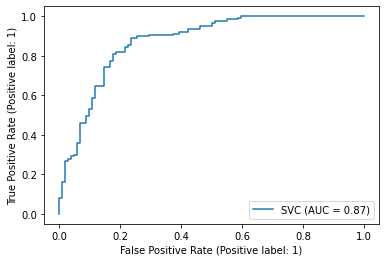

In [103]:
from sklearn import datasets 
from sklearn import metrics
from sklearn import model_selection
from sklearn.metrics import plot_roc_curve

disp = plot_roc_curve(svc,x_test,y_test)
plt.show()

# Saving The Model

In [104]:
import joblib
joblib.dump(Loan,"Loan_Application_Status.pkl")

['Loan_Application_Status.pkl']

# Predicting Saved Model

In [106]:
model = joblib.load("Loan_Application_Status.pkl")

prediction = model.predict(x_test)
prediction

array([0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1])

In [107]:
pd.DataFrame([model.predict(x_test)[:],y_test[:]],index=["Predicted","Original"])


,0,1,2,3,4,5,6,7,8,9,...,229,230,231,232,233,234,235,236,237,238
Predicted,0,1,1,1,0,1,1,1,1,1,...,0,0,0,1,0,0,0,0,0,1
Original,0,1,1,1,0,1,1,0,1,1,...,1,0,0,1,0,0,0,0,1,1
